# IMPORTS

In [1]:
# general import for data treatment and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# models we will be using
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
import pydot
import graphviz

# mse: metric used
import math
from sklearn import metrics
from IPython.display import display, Image

# INFOS ON THE DATASET & DATA PRE-PROCESSING

In [2]:
data = "C:/Users/Michelle/Desktop/Python for Data Analysis/projet/SeoulBikeData.csv"

In [3]:
dataset = pd.read_csv(data, sep=',', encoding='latin1')

there is the need to specify the <b>encoding</b> because utf8 and by default didn't work

<i>(because the last columns of the dataset are string values where before it is int or float values)</i>

In [4]:
dataset.shape

(8760, 14)

In [5]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


First lead : we can see here that there are a lot of 0 in the column snowfall (rainfall too) so if its influence is very low we will not take them into account in our model.

In [8]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

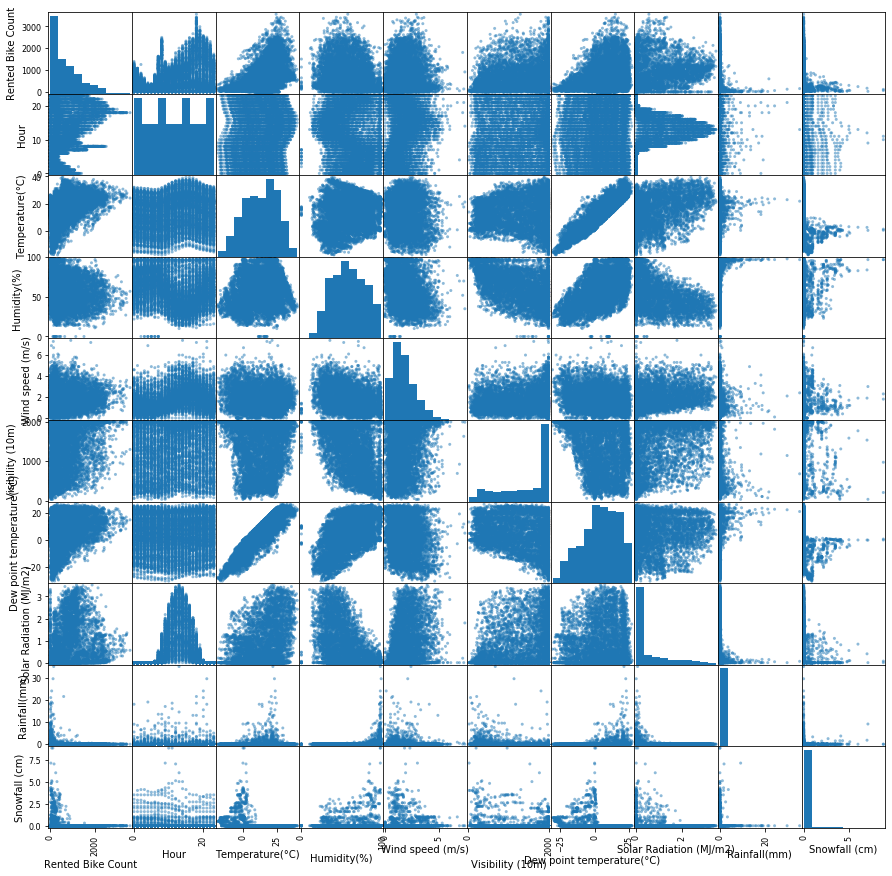

In [10]:
infos = pd.plotting.scatter_matrix(dataset, figsize=(15,15))

This histogram shows us that apparently, there is few relation between rainfall, snowfall and the number of rented bikes.
The relation between Temperature and Dew point temperature seems to be linear, let's check all this with a correlation matrix.
We'll use pearson's model just to have an idea of the correlations, we will discuss the relevance of other models later

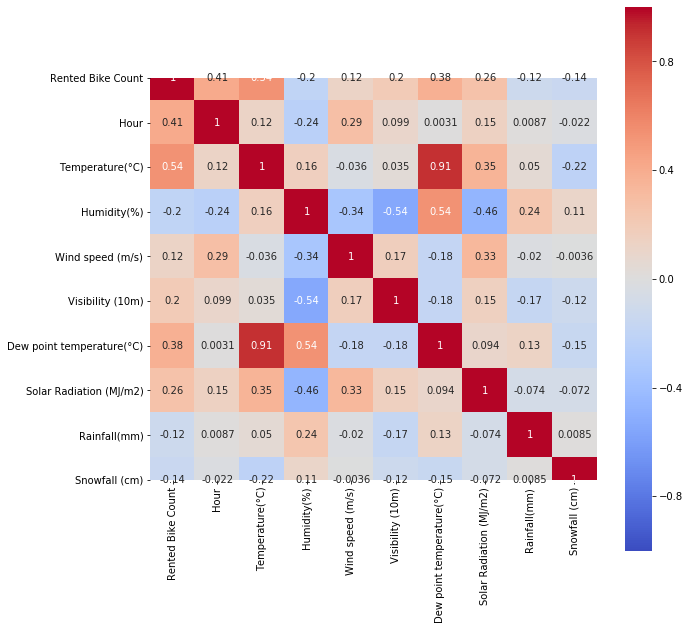

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

We used the correlation matrix here to be able to compare values after manipulating columnns and row. 

We can also see that Dew Point temperature is very related to temperature so we are considering deleting it, we'll discuss it later because it still has a 0.38 relation with the Rental number...

A last thing that is worth saying is that we can see that the temperature and the hour are the most related to the number of rentals. We will keep that in mind for the model.

Nevertheless, seansons, date, holiday and functioning day are missing (bc they are objects) so let's convert them into ints.

## Manipulating some columns
### Functioning Day

In [12]:
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

We can see that there are 295 counts on non fonctioning days... This data is needless in the study of the dataset because it won't show the real correlation between variables. If there were more than 295 rows the computer will think that on days where the weather is ideal, there are no rentals so no relation between these variables. Here the number of No is low so it is not supposed to make a hudge difference but we decided to delete the lines where functioning day is "no" anyways and then, delete the entire column.

In [13]:
indexDays = dataset[ dataset['Functioning Day'] == 'No' ].index

In [14]:
dataset.drop(indexDays , inplace=True)

In [15]:
dataset['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

In [16]:
del dataset['Functioning Day']
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


Now we're done with this column! let's see if the correlation matrix changes

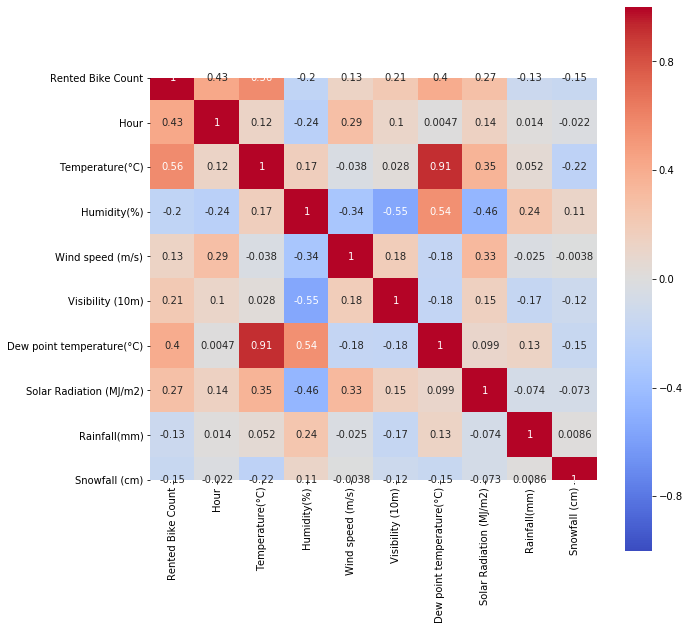

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

We can see that the matrix is pretty much the same. There is a slight difference between some values but the change is ridiculous. We were right about the fact that this column had no utility.

### Changing the data type for every dtype = object

In [18]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
dtype: object

So it is concerning the columns Seasons, Holiday and Date

#### Seasons 

In [19]:
dataset.Seasons.value_counts()

Summer    2208
Spring    2160
Winter    2160
Autumn    1937
Name: Seasons, dtype: int64

In [20]:
dataset.replace(to_replace=['Winter','Spring','Summer','Autumn'], value=['0','1','2','3'], inplace=True)
dataset = dataset.astype({"Seasons": int})
dataset.Seasons.value_counts()

2    2208
1    2160
0    2160
3    1937
Name: Seasons, dtype: int64

In [21]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday


#### Holiday

In [22]:
dataset.Holiday.value_counts()

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64

In [23]:
dataset.replace(['Holiday', 'No Holiday'], ['1','0'], inplace=True)
dataset = dataset.astype({"Holiday": int})
dataset['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

In [24]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0


#### Date

For this column we decided to group our dates by month

In [25]:
dataset['Date']=pd.to_datetime(dataset.Date, format = "%d/%m/%Y")
dataset['Month']=dataset['Date'].dt.month
dataset['Month'].value_counts()

7     744
12    744
3     744
1     744
8     744
6     720
5     720
4     696
2     672
10    665
11    648
9     624
Name: Month, dtype: int64

In [26]:
del dataset['Date']

In [27]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,12


Let's see how it's going now...

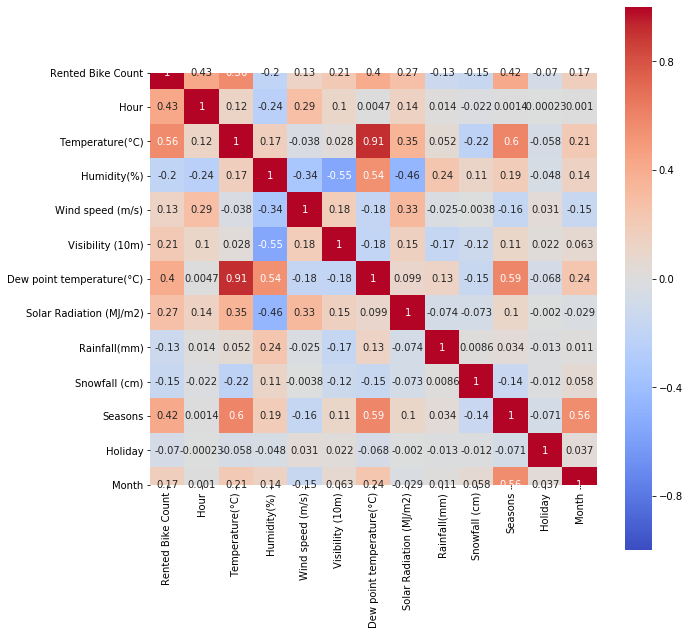

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

Ahh that's better! We can then see that the season has a hudge impact on the number of rentals! But is holiday useful ?
Let's now analyse the values in the other columns

In [29]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month'],
      dtype='object')

In [30]:
dataset['Visibility (10m)'].value_counts()

2000    2150
1995      32
1989      27
1985      27
1996      27
        ... 
225        1
571        1
135        1
119        1
72         1
Name: Visibility (10m), Length: 1780, dtype: int64

In [31]:
dataset['Wind speed (m/s)'].value_counts()

1.1    405
1.2    388
1.0    376
0.9    375
0.8    371
      ... 
6.9      1
7.2      1
6.7      1
7.4      1
7.3      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [32]:
dataset['Humidity(%)'].value_counts()

97    173
53    167
43    161
56    154
47    153
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64

In [33]:
dataset['Temperature(°C)'].value_counts()

 19.1    39
 20.5    38
 23.4    38
 7.6     37
 24.2    36
         ..
 36.0     1
-16.5     1
-12.9     1
 35.9     1
 38.0     1
Name: Temperature(°C), Length: 546, dtype: int64

In [34]:
dataset['Dew point temperature(°C)'].value_counts()

 0.0     60
 21.1    43
 21.2    40
 21.8    39
 2.2     38
         ..
-26.6     1
-29.1     1
 26.6     1
 25.9     1
 26.3     1
Name: Dew point temperature(°C), Length: 556, dtype: int64

In [35]:
dataset['Solar Radiation (MJ/m2)'].value_counts()

0.00    4151
0.01     124
0.02      78
0.03      65
0.06      61
        ... 
3.32       1
3.44       1
3.22       1
2.69       1
3.49       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [36]:
dataset['Rainfall(mm)'].value_counts()

0.0     7949
0.5      114
1.0       64
1.5       55
0.1       44
        ... 
5.4        1
21.0       1
15.5       1
10.5       1
9.1        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [37]:
dataset['Snowfall (cm)'].value_counts()

0.0    8022
0.3      42
1.0      39
0.5      34
0.9      34
0.7      31
2.0      22
0.8      22
0.4      21
1.6      19
2.2      18
0.6      15
0.2      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
3.2       4
4.0       4
1.3       4
4.1       4
1.9       3
1.7       3
2.3       3
3.3       3
2.4       3
3.7       3
3.8       3
2.1       3
1.1       3
2.8       2
4.8       2
5.0       2
1.4       2
2.9       2
8.8       2
3.4       2
0.1       2
4.3       2
3.9       2
6.0       1
7.0       1
3.6       1
4.2       1
5.1       1
3.1       1
7.1       1
1.5       1
Name: Snowfall (cm), dtype: int64

In [38]:
dataset['Hour'].value_counts()

23    353
12    353
8     353
16    353
9     353
17    353
10    353
18    353
11    353
15    353
19    353
20    353
13    353
21    353
14    353
22    353
7     353
4     352
5     352
3     352
2     352
6     352
1     352
0     352
Name: Hour, dtype: int64

In [39]:
dataset['Month'].value_counts()

7     744
12    744
3     744
1     744
8     744
6     720
5     720
4     696
2     672
10    665
11    648
9     624
Name: Month, dtype: int64

Only the Month and Hour columns have a great homogeneity, the other columns have a lot of values and some values appear just once or twice... what do we do about that ? More specificaly, rain and snow fall have a loooot of 0 values... Aren't values other than 0 outliers ?

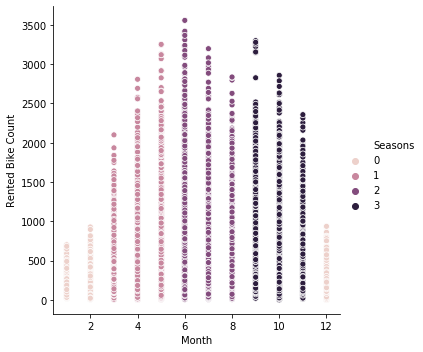

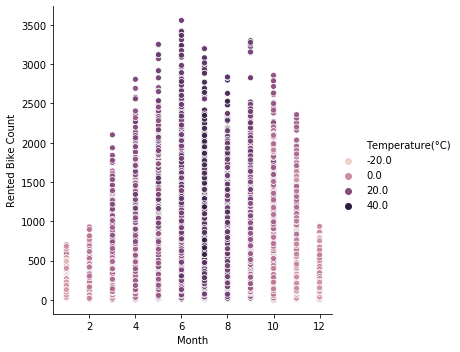

In [40]:
sns.relplot(x='Month',y='Rented Bike Count',hue='Seasons',data=dataset)
plt.show()

sns.relplot(x='Month',y='Rented Bike Count',hue='Temperature(°C)',data=dataset)
plt.show()

We can see that seasons and temperature clearly have an influence on the bike rental

In [41]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month'],
      dtype='object')

### Looking for outliers

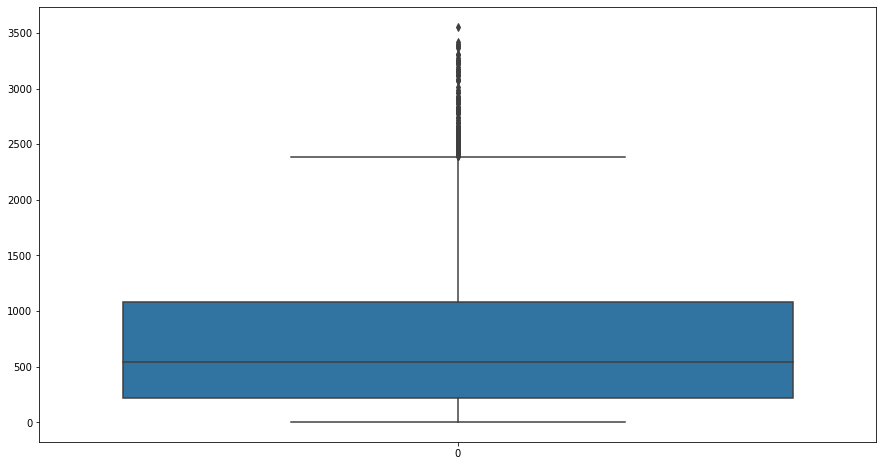

In [42]:
fig,ax=plt.subplots(figsize=(15,8))

sns.boxplot(data=dataset['Rented Bike Count'])
plt.show()

We can see that there is a good amount of outliers... let's check this with another plot to be sure

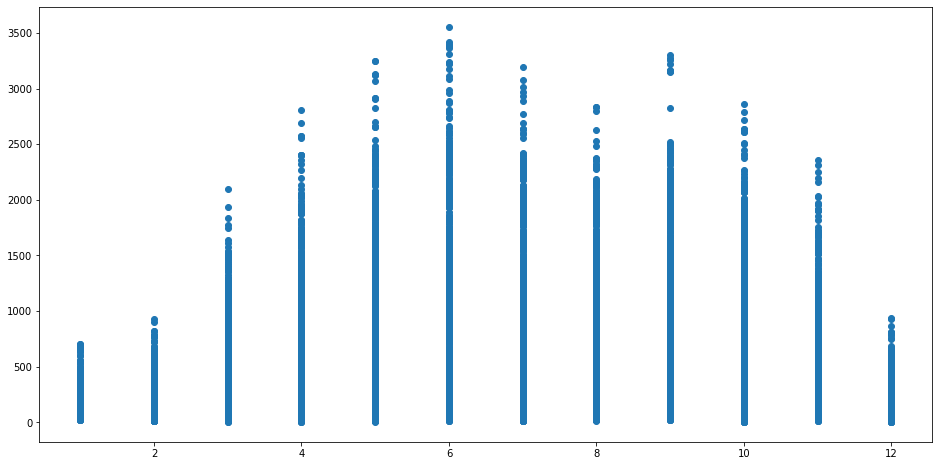

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataset['Month'], dataset['Rented Bike Count'])

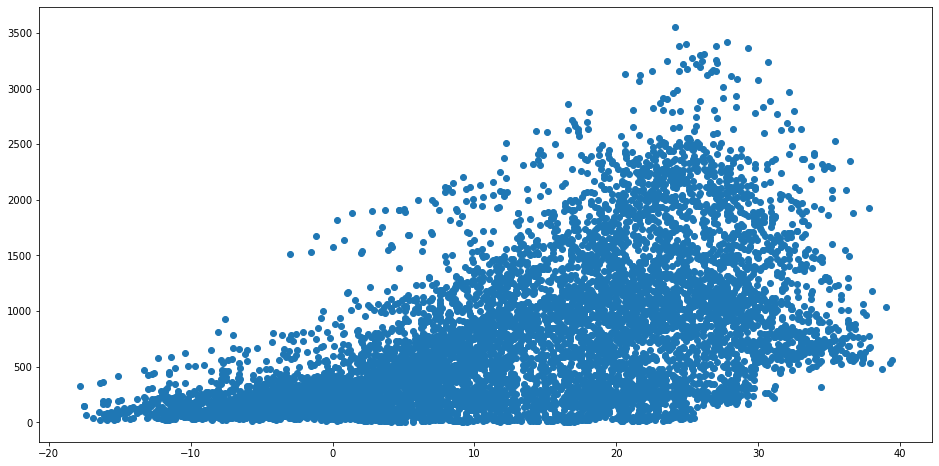

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataset['Temperature(°C)'], dataset['Rented Bike Count'])

Indeed, there are some ouliers in this dataset... removing them will help us getting more accurate models.

In [45]:
dataset.drop(dataset[dataset['Rented Bike Count'] >= 2265].index, inplace = True)
dataset.shape

(8212, 13)

After testing a lot of values, we found that the best threshold is 2265. This is the greatest value where there is no outliers on the boxplot anymore.

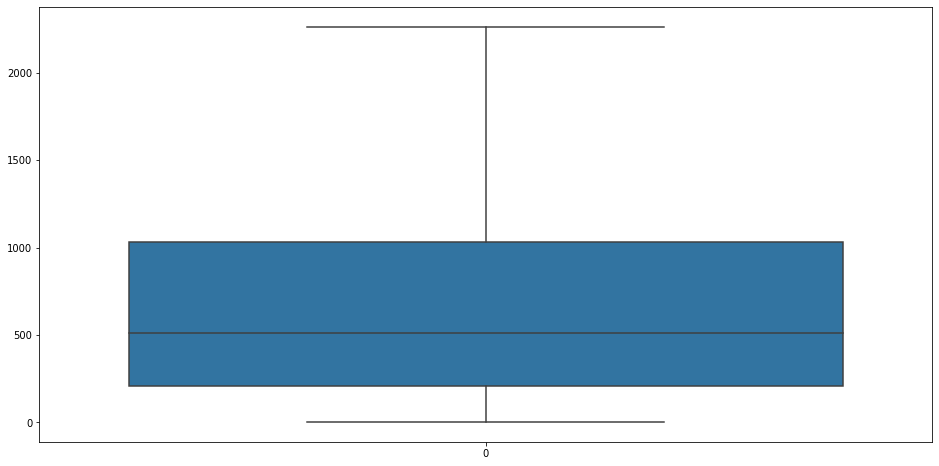

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=dataset['Rented Bike Count'])

In [47]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month'],
      dtype='object')

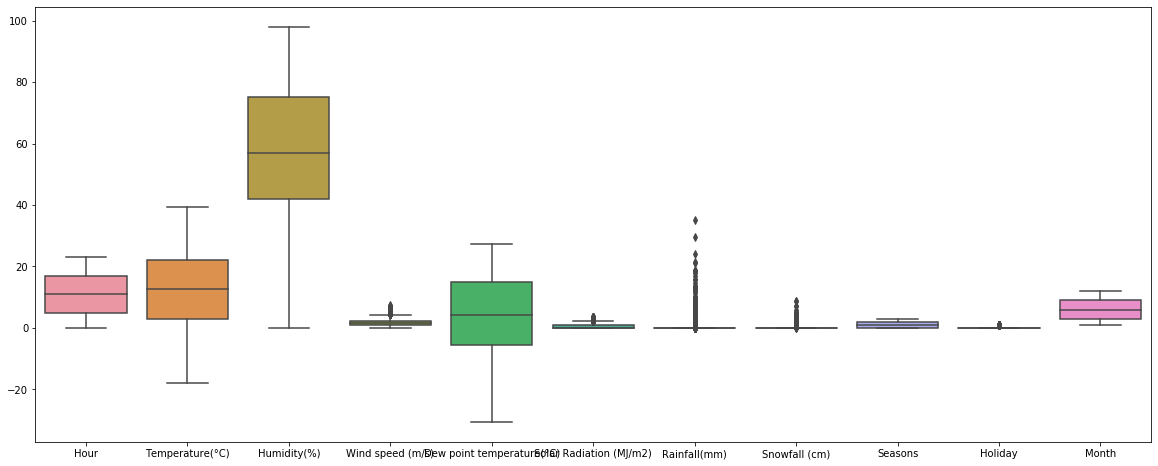

In [48]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=dataset[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)','Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month']])

There are lots of outliers for the rainfall and snowfall columns... maybe we won't take them into account ?

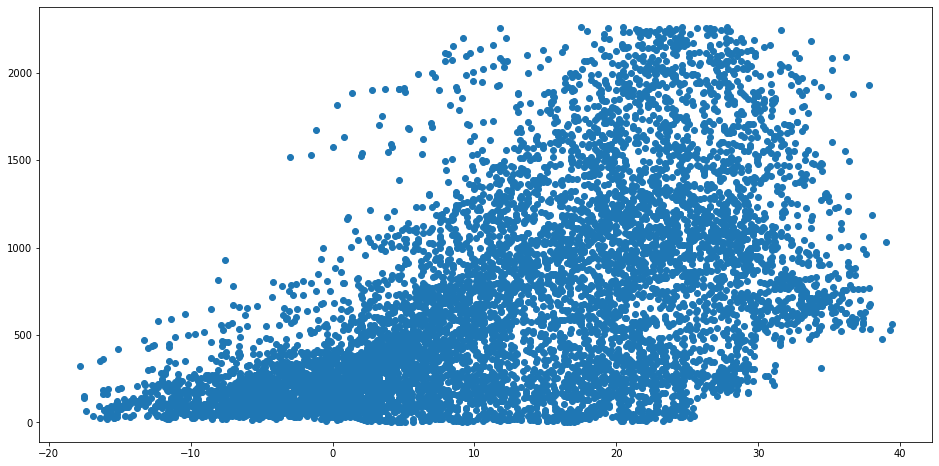

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataset['Temperature(°C)'], dataset['Rented Bike Count'])

This looks a little better now that we have removed some outliers. There are some remaining but we don't want to exclude too many values.

## Looking for correlations

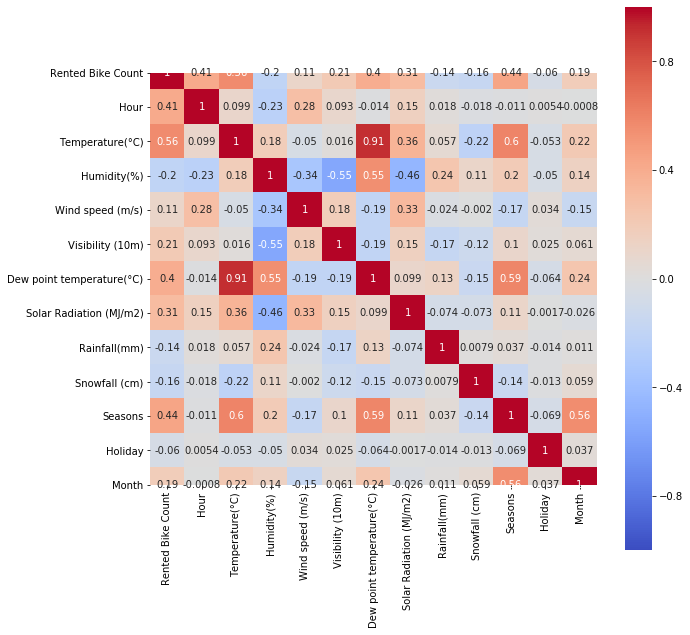

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True);

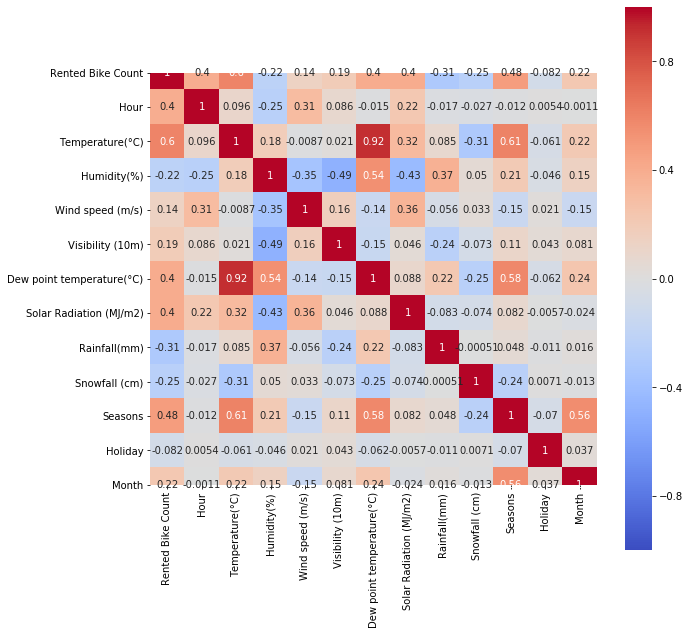

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("spearman"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True);

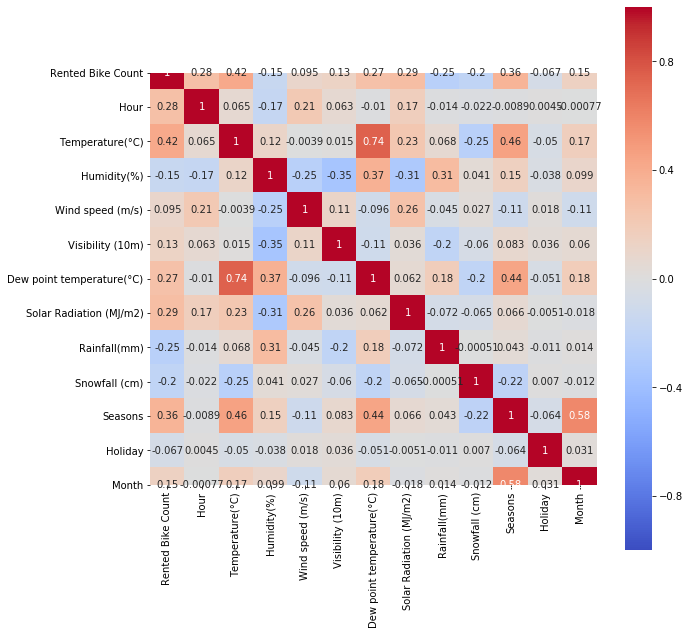

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("kendall"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

We can notice that the Kendall corr is a bit different than the two others. Pearson and Spearman are very close so we'll prefer to take them as reference

# Trying models

### Linear regression (shouldn't work)

In [53]:
y = dataset['Rented Bike Count']
x = dataset.drop(['Rented Bike Count'],axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
5757,21,29.1,78,1.1,1362,24.8,0.00,0.0,0.0,2,0,7
222,6,-0.5,90,0.9,91,-1.9,0.00,2.5,2.7,0,0,12
5852,20,34.5,62,2.8,1701,26.1,0.02,0.0,0.0,2,0,8
4882,10,26.3,34,0.9,1792,9.1,2.57,0.0,0.0,2,0,6
4308,12,23.1,64,2.6,1250,15.9,1.35,0.0,0.0,1,0,5


In [55]:
x_train.shape,x_test.shape

((6569, 12), (1643, 12))

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

#let's take a look to the coefs
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Hour,25.340189
Temperature(°C),11.507803
Humidity(%),-10.154449
Wind speed (m/s),7.870237
Visibility (10m),-0.009495
Dew point temperature(°C),11.369534
Solar Radiation (MJ/m2),-32.073574
Rainfall(mm),-56.595614
Snowfall (cm),13.285933
Seasons,111.837542


In [57]:
model_score=model.score(x_train,y_train)
print('Accuracy of model :',model_score)

Accuracy of model : 0.5445066370532157


Here we can see that according to this model, Visibility, Dew point temperature, Month, humidity, wind speed and snowfall have very low impact on our predicted variable. Which is a looooot of variable. The linear regression is certainly not a good model. 

We could think that we were right about the fact the Dew point temperature is too related to the temperature so we can do without it ?

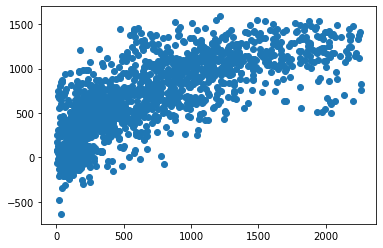

In [58]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([ 17.,  78., 269., 539., 396., 189.,  96.,  35.,  12.,  12.]),
 array([-1031.66547028,  -771.87307456,  -512.08067884,  -252.28828312,
            7.5041126 ,   267.29650832,   527.08890404,   786.88129976,
         1046.67369548,  1306.4660912 ,  1566.25848692]),
 <a list of 10 Patch objects>)

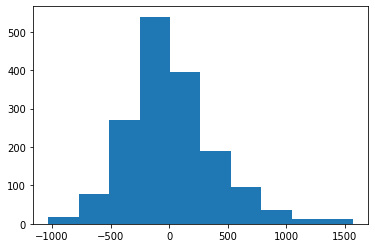

In [59]:
plt.hist(y_test - predictions)

In [60]:
r2_scores = cross_val_score(model, x_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.5417616971201903


In [61]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,predictions))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 376.4497409142398
Mean absolute error : 286.01248949319614


As we can see, this model isn't very well distributed... The first scatter shows that our predictions aren't good enough... 
The R-Squared value isn't good either! And the mse is pretty high.
Let's to remove our non pertinant columns from our model and see if it gets better.

In [62]:
x_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month'],
      dtype='object')

In [63]:
train = x_train[['Hour', 'Temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Seasons',
       'Holiday']].copy(deep=True)
#We removed the "unnecessary" columns
model2 = LinearRegression()
model2.fit(train, y_train)

#let's take a look to the coefs
pd.DataFrame(model2.coef_, train.columns, columns = ['Coeff'])

,Coeff
Hour,29.599437
Temperature(°C),17.423457
Solar Radiation (MJ/m2),62.064416
Rainfall(mm),-80.513514
Seasons,105.788889
Holiday,-72.432852


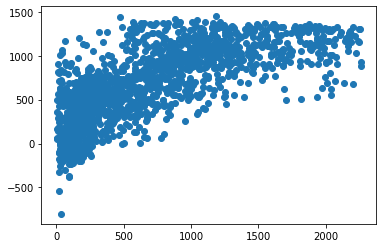

In [64]:
test = x_test[['Hour', 'Temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Seasons',
       'Holiday']].copy(deep=True)
predictions = model2.predict(test)
plt.scatter(y_test, predictions)

This isn't any better! Let's move on

### Decision Tree Regressor (should work better)

In [65]:
dtree=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [66]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [67]:
dtree_score=dtree.score(x_train,y_train)
print('Accuracy of model :',dtree_score)

Accuracy of model : 0.6928898263107128


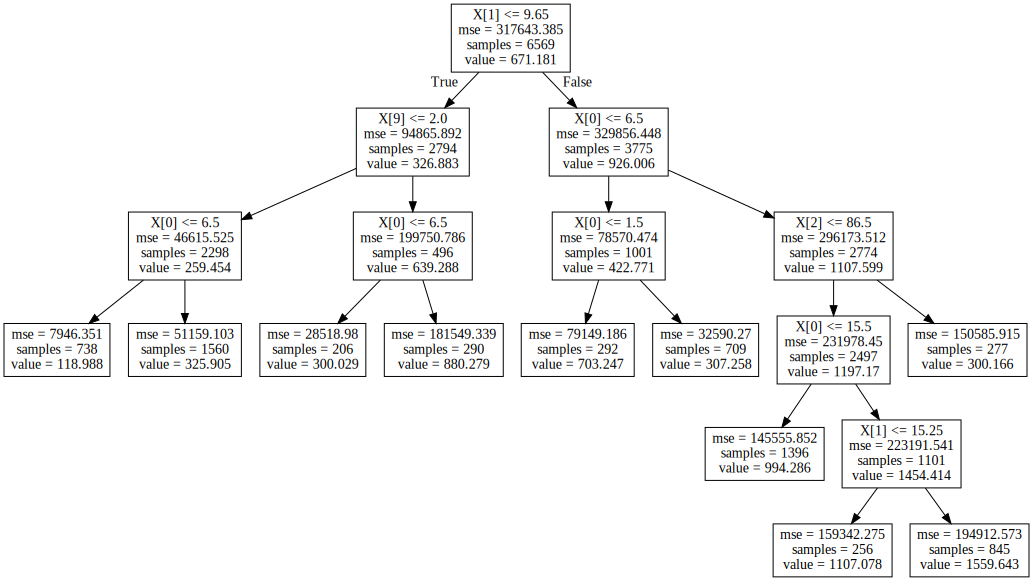

In [68]:
# if you don't have the packages, do :
# pip install pydot
# conda install python-graphviz
# restart your kernel

ddata = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(ddata) 
graph

In [69]:
predict=cross_val_predict(dtree,x_train,y_train,cv=3)
predict

array([1603.03339192,  111.62197802, 1603.03339192, ...,  335.43619048,
        898.81      ,  121.69108911])

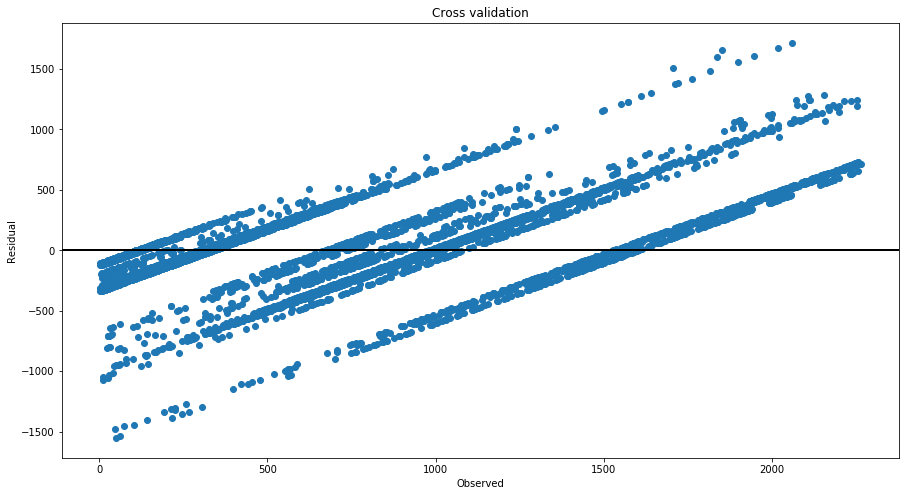

In [70]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [71]:
r2_scores = cross_val_score(dtree, x_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.6769908555292079


In [72]:
dtree_pred=dtree.predict(x_test)
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtree_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtree_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 308.23546823789684
Mean absolute error : 219.4796668001034


### Random Forest (should be even better)

In [102]:
rf=RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [103]:
rf_score =rf.score(x_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9815964135385716


In [104]:
predict=cross_val_predict(rf,x_train,y_train,cv=3)
predict

array([1549.585,   91.16 , 1550.945, ...,  162.105, 1110.1  ,   46.535])

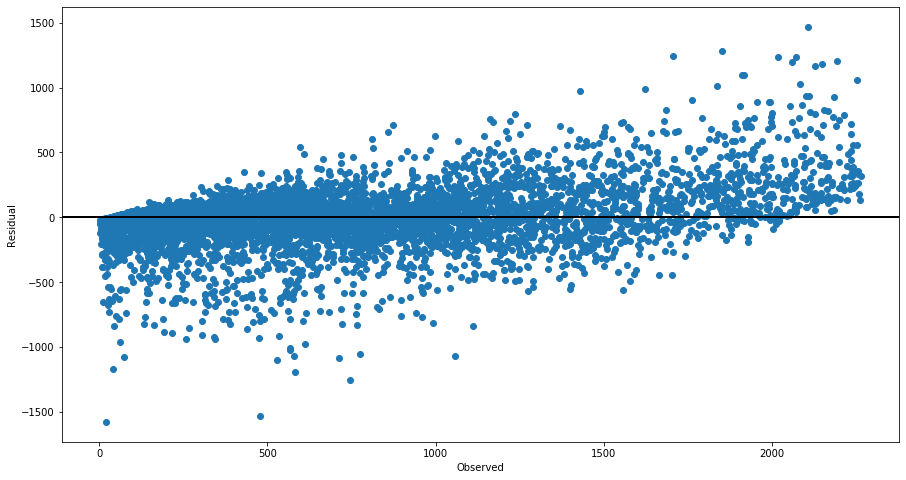

In [105]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [106]:
r2_scores = cross_val_score(rf, x_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8501343365646462


In [107]:
rf_pred=rf.predict(x_test)
pred = df = pd.DataFrame(data=rf_pred,columns=["predictions"])
pred

,predictions
0,139.200
1,547.570
2,752.605
3,1344.555
4,1159.360
...,...
1638,365.325
1639,152.930
1640,1075.305
1641,100.260


In [108]:
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 201.32421007440104
Mean absolute error : 125.9510407790627


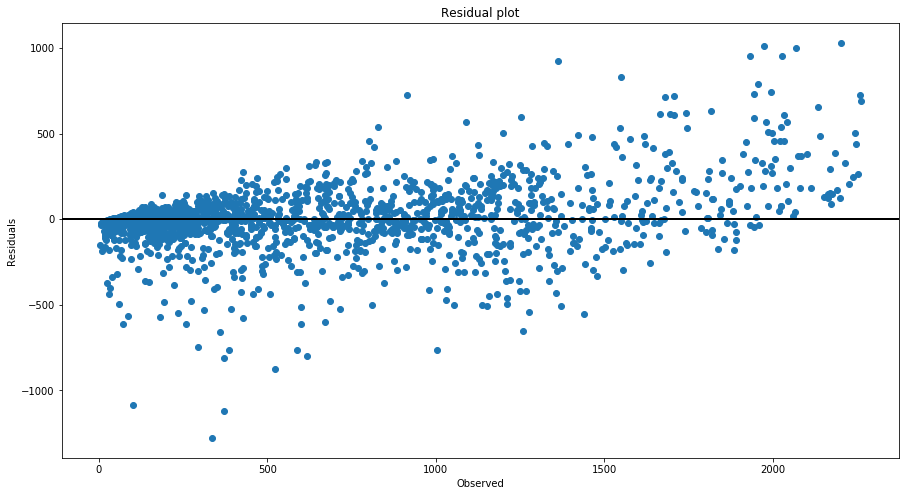

In [109]:
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

### The random forest model has the best R squared value and the lower mse. Then, we choose the random forest model as the best model for our dataset
#### Let's now see if playing with the features will improve the model

In [110]:
x_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Month'],
      dtype='object')

In [111]:
train = x_train[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Month']].copy(deep=True)
rf2=RandomForestRegressor(n_estimators=200)
rf2.fit(train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [112]:
rf_score =rf2.score(train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9811000273640419


In [113]:
r2_scores = cross_val_score(rf2, train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8500515237483409


In [114]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,predictions))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 388.02750052328827
Mean absolute error : 294.31307151569257


#### We tried to change the training set by deleting the columns that seemed to be irrelevant. We tried several combinations of features according to our corr matrix by removing the ones with the lowest score or only keeping the ones with the greatest scores.  
#### Nevertheless, we haven't found a better accuracy score and R² than in the the model above which is still less good than the initial one.

## To conclude, our best model is the random forest applied to all the features :)

# Adapating the random forest model to the Django API 

In [117]:
import pickle

In [119]:
with open( 'models' + ".p", "wb" ) as f:
    pickle.dump(rf,f)